Visualize a Pyloric solution slice colored by the amount of change in each bias value that would be incurred over a set period of time at that point. Similar to the maxmin detected slices, but potentially a step more informative because it takes into account how long it stays that way. The idea is that either i) the smallest values will correspond to the final resting places of solutions, or at least ii) some conception of a vector field can explain the domains of obvious movement and limit cycle-like objects may potentially emerge from them to explain long-term solutions

In [1]:
import numpy as np
import matplotlib.pyplot as plt

First, the version where all solutions are evaluated for the same amount of time, regardless of oscillation (probably would start to even out if time increased)

wait no it wouldn't...the important thing here is that magnitudes are *relative* to other points

In [2]:
#slice sampling params

par1min = -16.0
par1max = 16.0
par1step = .1
par2min = -16.0
par2max = 16.0
par2step = .1

par1_res = np.arange(par1min,par1max+par1step,par1step)
par2_res = np.arange(par2min,par2max+par2step,par2step)

print(len(par1_res),len(par2_res),len(par1_res)*len(par2_res))

321 321 103041


In [ ]:
change = np.loadtxt('../Cpp/TricksternetchangeX18_4.dat')
change = change.reshape((len(par1_res),len(par2_res),2))
change = np.swapaxes(change,1,0)

TricksterB1 = 3.87673
TricksterB3 = 7.72929 

In [ ]:
#normalize change
changemaxb1 = np.max(change[:,:,0])
changemaxb3 = np.max(change[:,:,1])
changemax = [changemaxb1, changemaxb3]
changeminb1 = -np.min(change[:,:,0]) #assuming this will be negative
changeminb3 = -np.min(change[:,:,1])
changemin = [changeminb1,changeminb3]

for i in range(len(change)):
    for j in range(len(change[0])):
        for k in range(2):
            if change[i,j,k] > 0:
                change[i,j,k] = change[i,j,k] / changemax[k]
            else: 
                change[i,j,k] = change[i,j,k] / changemin[k]

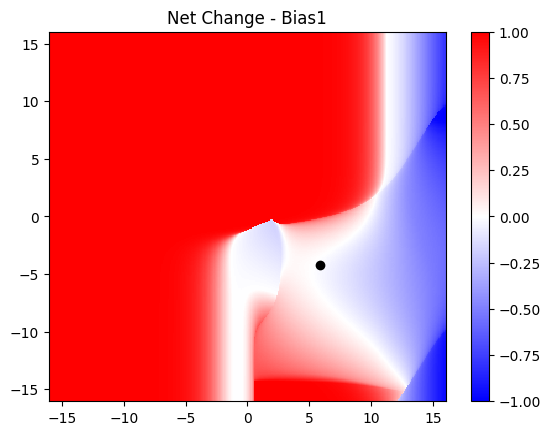

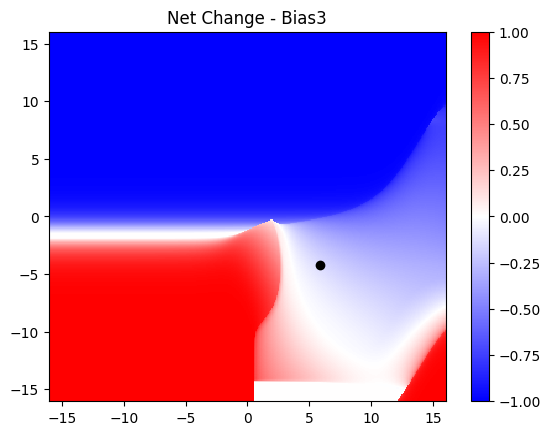

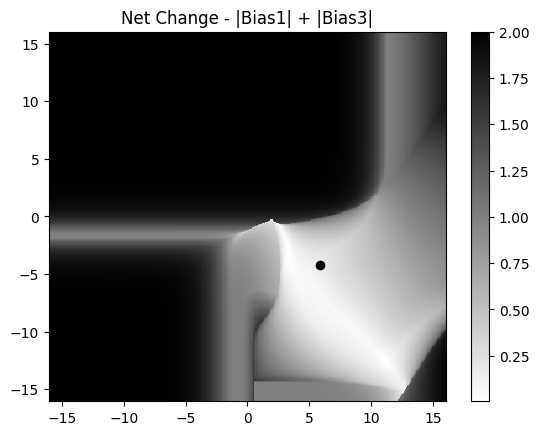

In [ ]:
plt.pcolormesh(par1_res,par2_res,change[:,:,0],cmap='bwr')
plt.colorbar()
plt.scatter(YavinB1,YavinB3,color='k')
# for i in biastrackindices:
#     plt.plot(biastrack[i,:,0],biastrack[i,:,1])
plt.title('Net Change - Bias1')
plt.show()
plt.pcolormesh(par1_res,par2_res,change[:,:,1],cmap='bwr')
plt.colorbar()
plt.scatter(YavinB1,YavinB3,color='k')
# for i in biastrackindices:
#     plt.plot(biastrack[i,:,0],biastrack[i,:,1])
plt.title('Net Change - Bias3')
plt.show()
plt.pcolormesh(par1_res,par2_res,np.abs(change[:,:,0])+np.abs(change[:,:,1]),cmap='binary')
plt.colorbar()
plt.scatter(YavinB1,YavinB3,color='k')
plt.title('Net Change - |Bias1| + |Bias3|')
plt.show()

In [4]:
change = np.loadtxt('../Cpp/YavinnetchangeX99_0.dat')
change = change.reshape((len(par1_res),len(par2_res),2))
change = np.swapaxes(change,1,0)

YavinB1 = 5.84688
YavinB3 = -4.23992

In [5]:
#normalize change
changemaxb1 = np.max(change[:,:,0])
changemaxb3 = np.max(change[:,:,1])
changemax = [changemaxb1, changemaxb3]
changeminb1 = -np.min(change[:,:,0]) #assuming this will be negative
changeminb3 = -np.min(change[:,:,1])
changemin = [changeminb1,changeminb3]

for i in range(len(change)):
    for j in range(len(change[0])):
        for k in range(2):
            if change[i,j,k] > 0:
                change[i,j,k] = change[i,j,k] / changemax[k]
            else: 
                change[i,j,k] = change[i,j,k] / changemin[k]

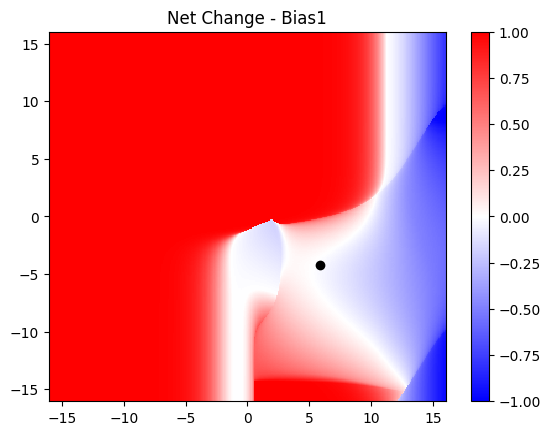

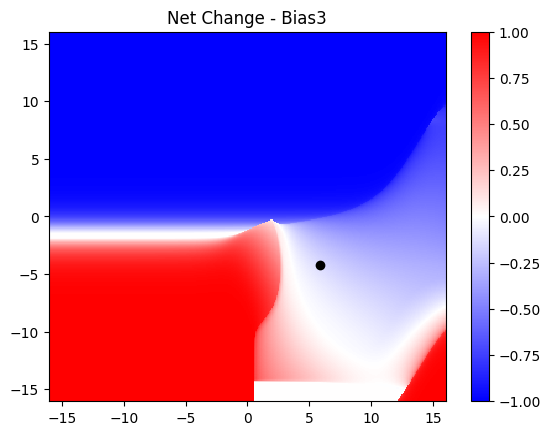

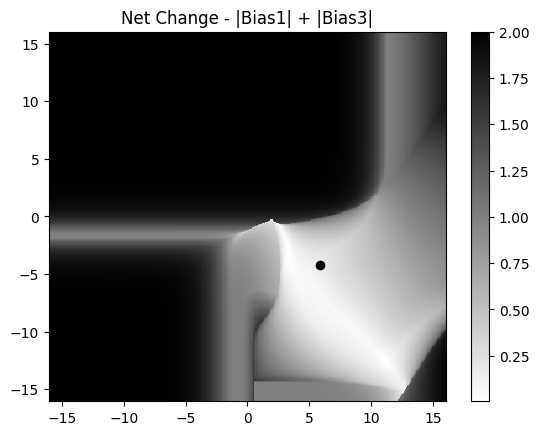

In [6]:
plt.pcolormesh(par1_res,par2_res,change[:,:,0],cmap='bwr')
plt.colorbar()
plt.scatter(YavinB1,YavinB3,color='k')
# for i in biastrackindices:
#     plt.plot(biastrack[i,:,0],biastrack[i,:,1])
plt.title('Net Change - Bias1')
plt.show()
plt.pcolormesh(par1_res,par2_res,change[:,:,1],cmap='bwr')
plt.colorbar()
plt.scatter(YavinB1,YavinB3,color='k')
# for i in biastrackindices:
#     plt.plot(biastrack[i,:,0],biastrack[i,:,1])
plt.title('Net Change - Bias3')
plt.show()
plt.pcolormesh(par1_res,par2_res,np.abs(change[:,:,0])+np.abs(change[:,:,1]),cmap='binary')
plt.colorbar()
plt.scatter(YavinB1,YavinB3,color='k')
plt.title('Net Change - |Bias1| + |Bias3|')
plt.show()

In [59]:
change = np.loadtxt('../Cpp/Wandanetchangegeneralist25.dat')
change = change.reshape((len(par1_res),len(par2_res),2))
change = np.swapaxes(change,1,0)

WandaB1 = 9.91169
WandaB3 = 5.98138

biastrack = np.loadtxt('../Cpp/Wandageneralist25biastrack.dat')
dt = .01
runduration = 10000
runsteps = int(runduration/dt)
repeats = int(1000/100)
biastrack = biastrack.reshape(repeats, runsteps, 2)

In [ ]:
#normalize the change
changemaxb1 = np.max(change[:,:,0])
changemaxb3 = np.max(change[:,:,1])
changemax = [changemaxb1, changemaxb3]
changeminb1 = -np.min(change[:,:,0]) #assuming this will be negative
changeminb3 = -np.min(change[:,:,1])
changemin = [changeminb1,changeminb3]

for i in range(len(change)):
    for j in range(len(change[0])):
        for k in range(2):
            if change[i,j,k] > 0:
                change[i,j,k] = change[i,j,k] / changemax[k]
            else: 
                change[i,j,k] = change[i,j,k] / changemin[k]

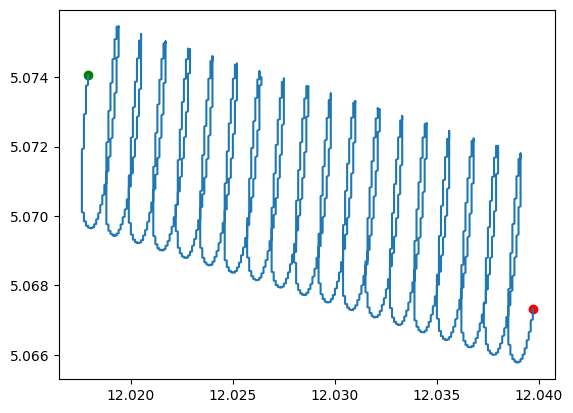

In [ ]:
#how I figured out that the coloring scheme is wrong
backup = 10000
plt.scatter(biastrack[1,-backup,0],biastrack[1,-backup,1],color='g')
plt.scatter(biastrack[1,-1,0],biastrack[1,-1,1],color='r')
plt.plot(biastrack[1,-backup:,0],biastrack[1,-backup:,1])

#for final figures, this means I will need to recenter the data around zero before passing it to the graphing software. this would dull some of the colors at extremes, but
#won't be a big deal because those are fixed points anyway.

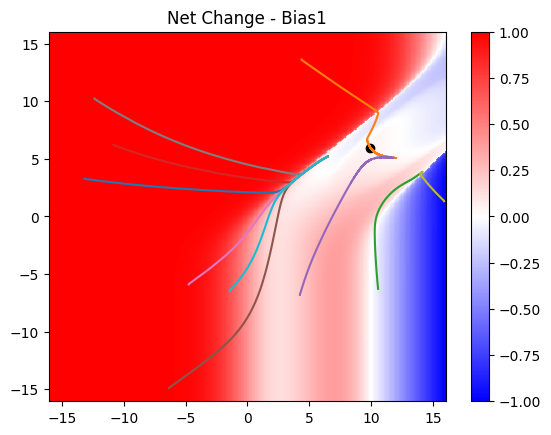

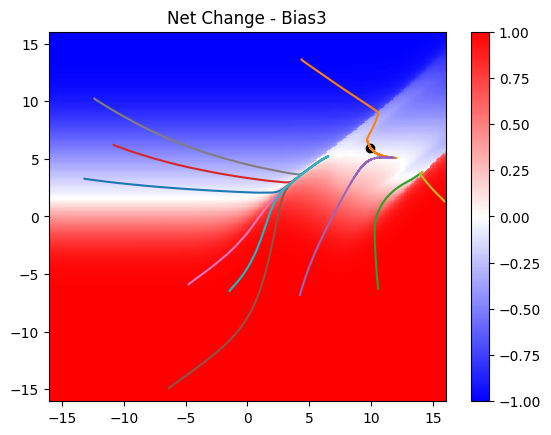

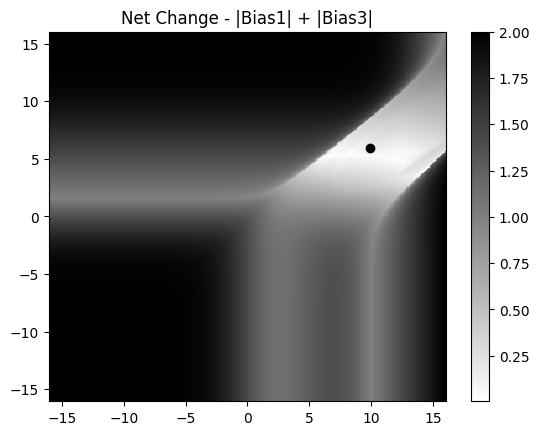

In [61]:
biastrackindices = range(len(biastrack))
plt.pcolormesh(par1_res,par2_res,change[:,:,0],cmap='bwr')
plt.colorbar()
plt.scatter(WandaB1,WandaB3,color='k')
for i in biastrackindices:
    plt.plot(biastrack[i,:,0],biastrack[i,:,1])
plt.title('Net Change - Bias1')
plt.show()
plt.pcolormesh(par1_res,par2_res,change[:,:,1],cmap='bwr')
plt.colorbar()
plt.scatter(WandaB1,WandaB3,color='k')
for i in biastrackindices:
    plt.plot(biastrack[i,:,0],biastrack[i,:,1])
plt.title('Net Change - Bias3')
plt.show()
plt.pcolormesh(par1_res,par2_res,np.abs(change[:,:,0])+np.abs(change[:,:,1]),cmap='binary')
plt.colorbar()
plt.scatter(WandaB1,WandaB3,color='k')
plt.title('Net Change - |Bias1| + |Bias3|')
plt.show()

In [5]:
change = np.loadtxt('../Cpp/UshernetchangeGeneralist25.dat')
change = change.reshape((len(par1_res),len(par2_res),2))
change = np.swapaxes(change,1,0)

UsherB1 = 10.5836
UsherB3 = -8.58126 

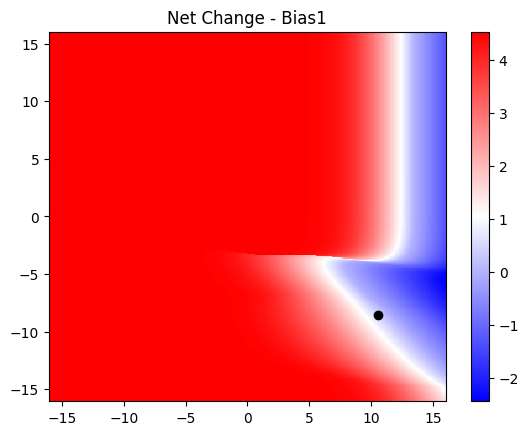

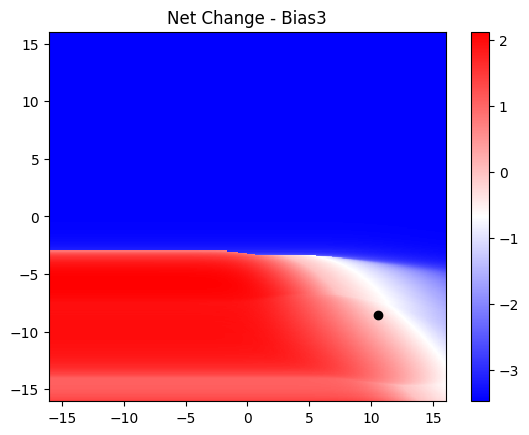

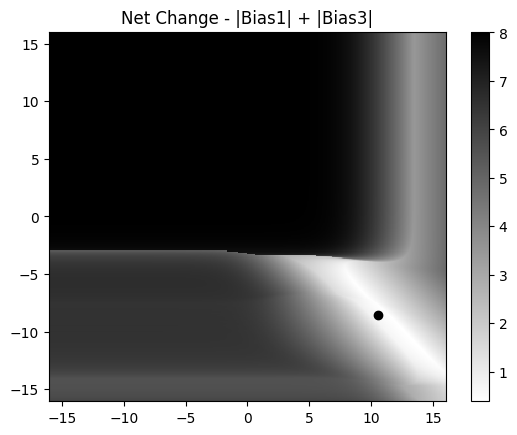

In [6]:
biastrackindices = [17]
plt.pcolormesh(par1_res,par2_res,change[:,:,0],cmap='bwr')
plt.colorbar()
plt.scatter(UsherB1,UsherB3,color='k')
plt.title('Net Change - Bias1')
plt.show()
plt.pcolormesh(par1_res,par2_res,change[:,:,1],cmap='bwr')
plt.colorbar()
plt.scatter(UsherB1,UsherB3,color='k')
plt.title('Net Change - Bias3')
plt.show()
plt.pcolormesh(par1_res,par2_res,np.abs(change[:,:,0])+np.abs(change[:,:,1]),cmap='binary')
plt.colorbar()
plt.scatter(UsherB1,UsherB3,color='k')
plt.title('Net Change - |Bias1| + |Bias3|')
plt.show()

In [21]:
change = np.loadtxt('../Cpp/VictornetchangeGeneralist25.dat')
change = change.reshape((len(par1_res),len(par2_res),2))
change = np.swapaxes(change,1,0)

VictorB1 = 0.845347
VictorB3 = 5.08454

biastrack = np.loadtxt('../Cpp/Victorgeneralist25biastrack.dat')
dt = .01
runduration = 10000
runsteps = int(runduration/dt)
repeats = int(1000/100)
biastrack = biastrack.reshape(repeats, runsteps, 2)

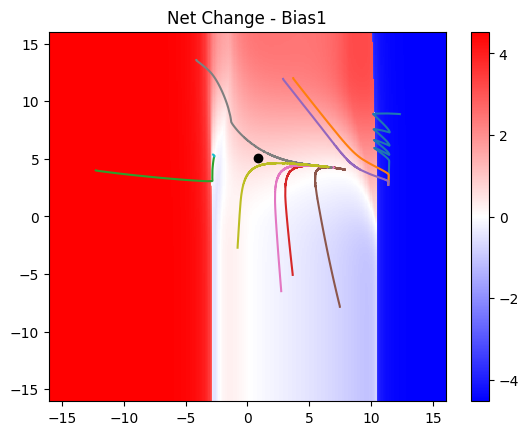

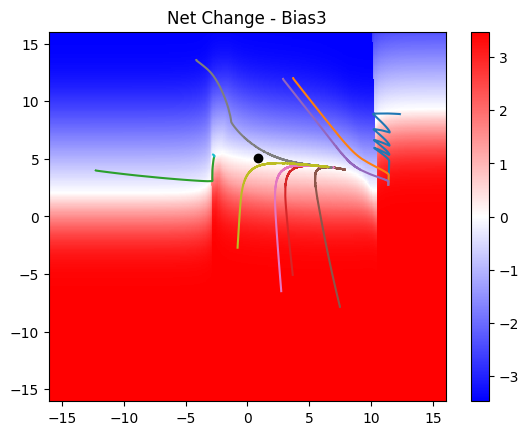

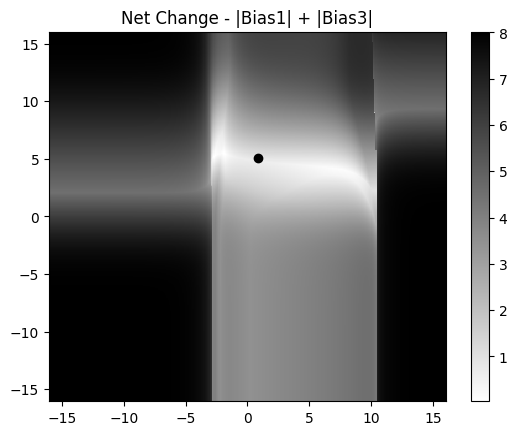

In [22]:
biastrackindices = range(len(biastrack))
plt.pcolormesh(par1_res,par2_res,change[:,:,0],cmap='bwr')
plt.colorbar()
plt.scatter(VictorB1,VictorB3,color='k')
for i in biastrackindices:
    plt.plot(biastrack[i,:,0],biastrack[i,:,1])
plt.title('Net Change - Bias1')
plt.show()
plt.pcolormesh(par1_res,par2_res,change[:,:,1],cmap='bwr')
plt.colorbar()
plt.scatter(VictorB1,VictorB3,color='k')
for i in biastrackindices:
    plt.plot(biastrack[i,:,0],biastrack[i,:,1])
plt.title('Net Change - Bias3')
plt.show()
plt.pcolormesh(par1_res,par2_res,np.abs(change[:,:,0])+np.abs(change[:,:,1]),cmap='binary')
plt.colorbar()
plt.scatter(VictorB1,VictorB3,color='k')
plt.title('Net Change - |Bias1| + |Bias3|')
plt.show()

compare the generalist performance (above) to the performance of the best specifically evolved HP (below)

In [17]:
change = np.loadtxt('../Cpp/Victornetchange33.dat')
change = change.reshape((len(par1_res),len(par2_res),2))
change = np.swapaxes(change,1,0)

VictorB1 = 0.845347
VictorB3 = 5.08454

biastrack = np.loadtxt('../Cpp/Victor33biastrack.dat')
dt = .01
runduration = 10000
runsteps = int(runduration/dt)
repeats = int(1000/100)
biastrack = biastrack.reshape(repeats, runsteps, 2)

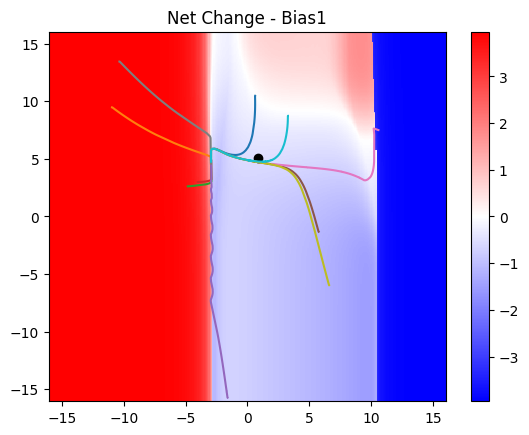

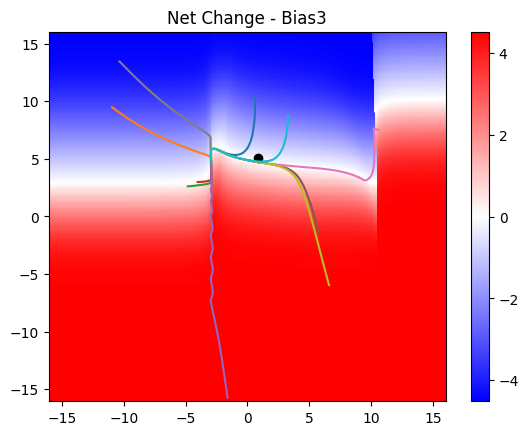

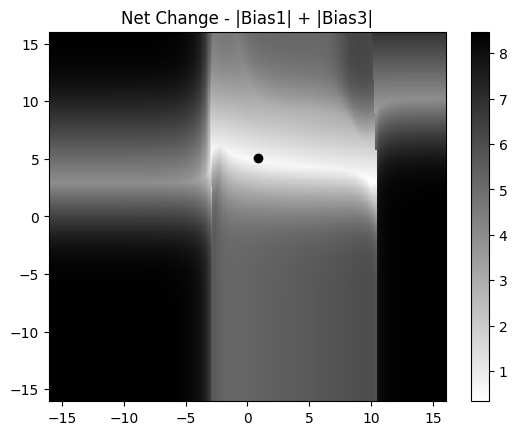

In [18]:
biastrackindices = range(len(biastrack))
plt.pcolormesh(par1_res,par2_res,change[:,:,0],cmap='bwr')
plt.colorbar()
plt.scatter(VictorB1,VictorB3,color='k')
for i in biastrackindices:
    plt.plot(biastrack[i,:,0],biastrack[i,:,1])
plt.title('Net Change - Bias1')
plt.show()
plt.pcolormesh(par1_res,par2_res,change[:,:,1],cmap='bwr')
plt.colorbar()
plt.scatter(VictorB1,VictorB3,color='k')
for i in biastrackindices:
    plt.plot(biastrack[i,:,0],biastrack[i,:,1])
plt.title('Net Change - Bias3')
plt.show()
plt.pcolormesh(par1_res,par2_res,np.abs(change[:,:,0])+np.abs(change[:,:,1]),cmap='binary')
plt.colorbar()
plt.scatter(VictorB1,VictorB3,color='k')
plt.title('Net Change - |Bias1| + |Bias3|')
plt.show()

In [19]:
change = np.loadtxt('../Cpp/Functioning2D/TestBestonDifferentSolutions/Pete/Petenetchange33.dat')
change = change.reshape((len(par1_res),len(par2_res),2))
change = np.swapaxes(change,1,0)

biastrack = np.loadtxt('../Cpp/Functioning2D/TestBestonDifferentSolutions/Pete/BiasTrack33.dat')
dt = .05
runduration = 10000+dt+dt
runsteps = int(runduration/dt)
repeats = int(1000/50)
biastrack = biastrack.reshape(repeats, runsteps, 2)

In [21]:
#define zoom parameters
# zoomx_min = -16
# zoomx_max = 15.9
# zoomy_min = -16
# zoomy_max = -15.9
# zoomx_min_idx = np.where(par1_res.round(2)==zoomx_min)[0][0]
# zoomx_max_idx = np.where(par1_res.round(2)==zoomx_max)[0][0]
# zoomy_min_idx = np.where(par2_res.round(2)==zoomy_min)[0][0]
# zoomy_max_idx = np.where(par2_res.round(2)==zoomy_max)[0][0]

# biastrackindices = range(2)
# biastrack_mintime = 0#len(biastrack[0])-int(500/dt)
# biastrack_maxtime = len(biastrack[0])

# print(zoomx_min_idx,zoomx_max_idx,zoomy_min_idx,zoomy_max_idx)
PeteB1 = 2.68606
PeteB3 = -8.09309

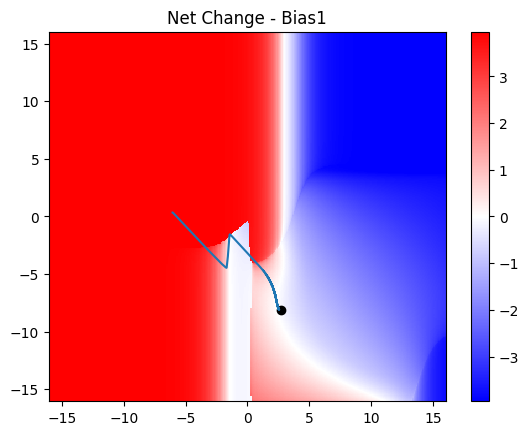

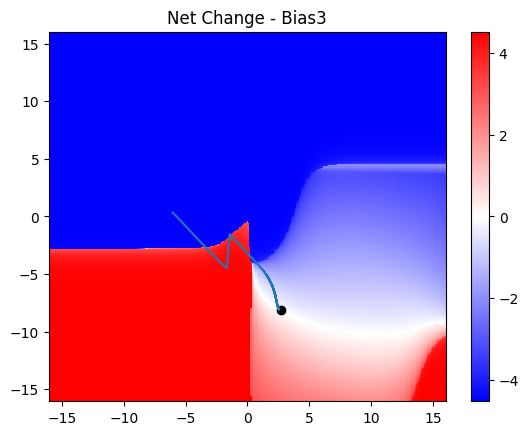

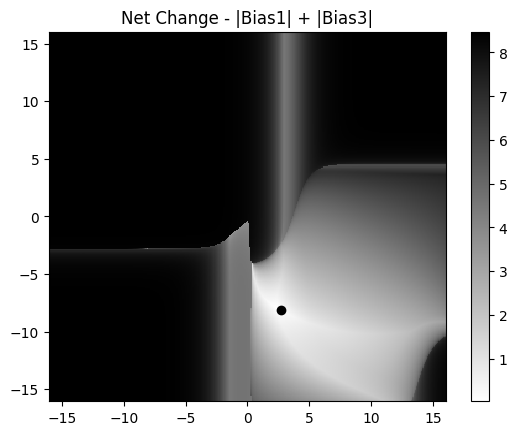

In [28]:
# plt.pcolormesh(par1_res[zoomx_min_idx:zoomx_max_idx],par2_res[zoomy_min_idx:zoomy_max_idx],change[zoomy_min_idx:zoomy_max_idx,zoomx_min_idx:zoomx_max_idx,0],cmap='bwr')
# plt.colorbar()
# if((PeteB1>zoomx_min)&(PeteB1<zoomx_max)&(PeteB3>zoomy_min)&(PeteB3<zoomy_max)):
#     plt.scatter(PeteB1,PeteB3,color='k')
# for i in biastrackindices:
#     plt.plot(biastrack[i,biastrack_mintime:biastrack_maxtime,0],biastrack[i,biastrack_mintime:biastrack_maxtime,1])
# plt.show()
# plt.pcolormesh(par1_res[zoomx_min_idx:zoomx_max_idx],par2_res[zoomy_min_idx:zoomy_max_idx],change[zoomy_min_idx:zoomy_max_idx,zoomx_min_idx:zoomx_max_idx,1],cmap='bwr')
# plt.colorbar()
# if((PeteB1>zoomx_min)&(PeteB1<zoomx_max)&(PeteB3>zoomy_min)&(PeteB3<zoomy_max)):
#     plt.scatter(PeteB1,PeteB3,color='k')
# for i in biastrackindices:
#     plt.plot(biastrack[i,biastrack_mintime:biastrack_maxtime,0],biastrack[i,biastrack_mintime:biastrack_maxtime,1])
# plt.show()
biastrackindices = [17]
plt.pcolormesh(par1_res,par2_res,change[:,:,0],cmap='bwr')
plt.colorbar()
plt.scatter(PeteB1,PeteB3,color='k')
for i in biastrackindices:
    plt.plot(biastrack[i,:,0],biastrack[i,:,1])
plt.title('Net Change - Bias1')
plt.show()
plt.pcolormesh(par1_res,par2_res,change[:,:,1],cmap='bwr')
plt.colorbar()
plt.scatter(PeteB1,PeteB3,color='k')
for i in biastrackindices:
    plt.plot(biastrack[i,:,0],biastrack[i,:,1])
plt.title('Net Change - Bias3')
plt.show()
plt.pcolormesh(par1_res,par2_res,np.abs(change[:,:,0])+np.abs(change[:,:,1]),cmap='binary')
plt.colorbar()
plt.scatter(PeteB1,PeteB3,color='k')
plt.title('Net Change - |Bias1| + |Bias3|')
plt.show()

Repeat with worse HP mechanism (37)

In [22]:
change = np.loadtxt('../Cpp/Functioning2D/TestBestonDifferentSolutions/Pete/Petenetchange37.dat')
change = change.reshape((len(par1_res),len(par2_res),2))
change = np.swapaxes(change,1,0)

biastrack = np.loadtxt('../Cpp/Functioning2D/TestBestonDifferentSolutions/Pete/BiasTrack37.dat')
dt = .01
runduration = 5000
runsteps = int(runduration/dt)
repeats = int(1000/20)
biastrack = biastrack.reshape(repeats, runsteps, 2)

In [23]:
#define zoom parameters
zoomx_min = -16
zoomx_max = 15.9
zoomy_min = -16
zoomy_max = -15.9
zoomx_min_idx = np.where(par1_res.round(2)==zoomx_min)[0][0]
zoomx_max_idx = np.where(par1_res.round(2)==zoomx_max)[0][0]
zoomy_min_idx = np.where(par2_res.round(2)==zoomy_min)[0][0]
zoomy_max_idx = np.where(par2_res.round(2)==zoomy_max)[0][0]

biastrackindices = range(2)
biastrack_mintime = 0#len(biastrack[0])-int(500/dt)
biastrack_maxtime = len(biastrack[0])

# print(zoomx_min_idx,zoomx_max_idx,zoomy_min_idx,zoomy_max_idx)
PeteB1 = 2.68606
PeteB3 = -8.09309

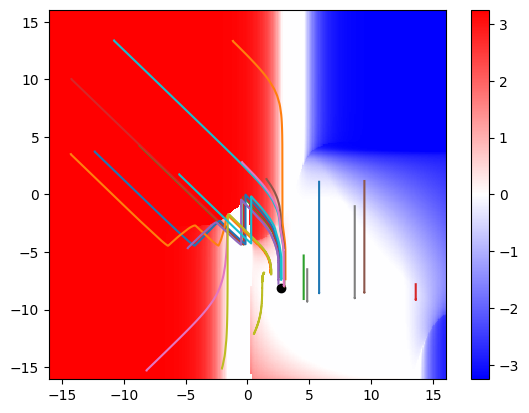

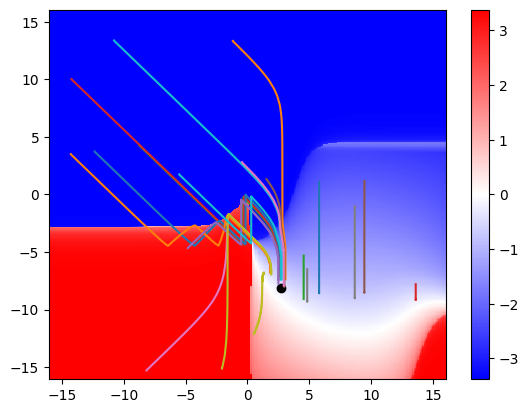

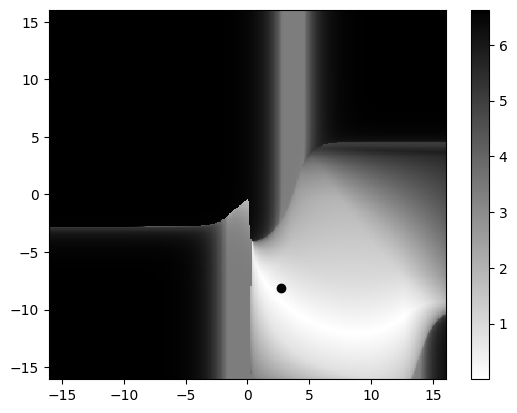

In [24]:
biastrackindices = range(20)
plt.pcolormesh(par1_res,par2_res,change[:,:,0],cmap='bwr')
plt.colorbar()
plt.scatter(PeteB1,PeteB3,color='k')
for i in biastrackindices:
    plt.plot(biastrack[i,:,0],biastrack[i,:,1])
plt.show()
plt.pcolormesh(par1_res,par2_res,change[:,:,1],cmap='bwr')
plt.colorbar()
plt.scatter(PeteB1,PeteB3,color='k')
for i in biastrackindices:
    plt.plot(biastrack[i,:,0],biastrack[i,:,1])
plt.show()
plt.show()
plt.pcolormesh(par1_res,par2_res,np.abs(change[:,:,0])+np.abs(change[:,:,1]),cmap='binary')
plt.colorbar()
plt.scatter(PeteB1,PeteB3,color='k')
plt.show()

Repeat the analysis in another slice (another Pyloric solution)

In [7]:
QuinnB1 = 1.77864
QuinnB3 = -8.61896
change = np.loadtxt('../Cpp/Quinnnetchange33.dat')
change = change.reshape((len(par1_res),len(par2_res),2))
change = np.swapaxes(change,1,0)

biastrack = np.loadtxt('../Cpp/QuinnBiasTrack33.dat')
dt = .01
runduration = 10000
runsteps = int(runduration/dt)
repeats = int(1000/20)
biastrack = biastrack.reshape(repeats, runsteps, 2)

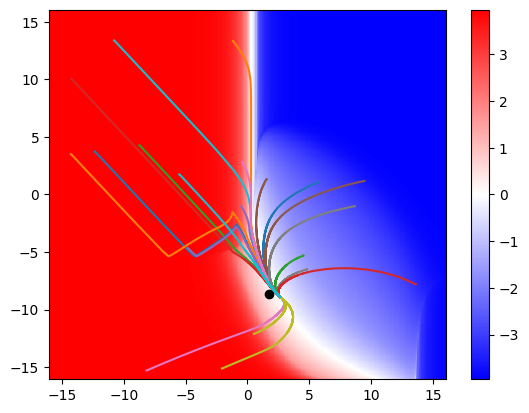

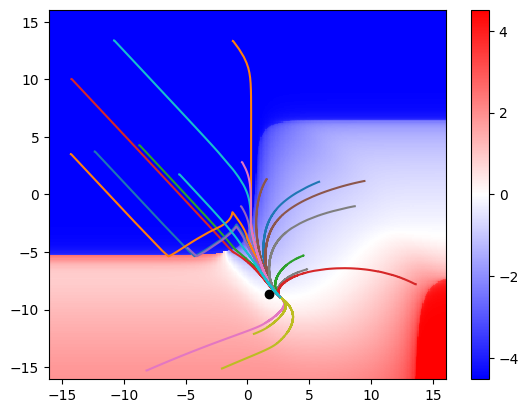

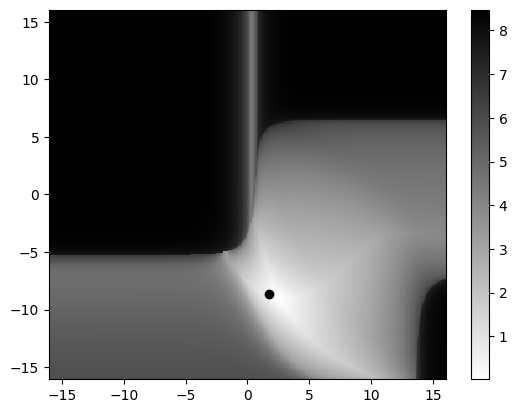

In [8]:
biastrackindices = range(20)
plt.pcolormesh(par1_res,par2_res,change[:,:,0],cmap='bwr')
plt.colorbar()
plt.scatter(QuinnB1,QuinnB3,color='k')
for i in biastrackindices:
    plt.plot(biastrack[i,:,0],biastrack[i,:,1])
plt.show()
plt.pcolormesh(par1_res,par2_res,change[:,:,1],cmap='bwr')
plt.colorbar()
plt.scatter(QuinnB1,QuinnB3,color='k')
for i in biastrackindices:
    plt.plot(biastrack[i,:,0],biastrack[i,:,1])
plt.show()
plt.show()
plt.pcolormesh(par1_res,par2_res,np.abs(change[:,:,0])+np.abs(change[:,:,1]),cmap='binary')
plt.colorbar()
plt.scatter(QuinnB1,QuinnB3,color='k')
plt.show()

And another...

In [139]:
SvenB1 = 4.04929
SvenB3 = -4.63354
change = np.loadtxt('../Cpp/Functioning2D/TestBestonDifferentSolutions/Sven/Svennetchange33.dat')
change = change.reshape((len(par1_res),len(par2_res),2))
change = np.swapaxes(change,1,0)

biastrack = np.loadtxt('../Cpp/Functioning2D/TestBestonDifferentSolutions/Sven/BiasTrack33.dat')
dt = .01
runduration = 5000
runsteps = int(runduration/dt)
repeats = int(1000/20)
biastrack = biastrack.reshape(repeats, runsteps, 2)

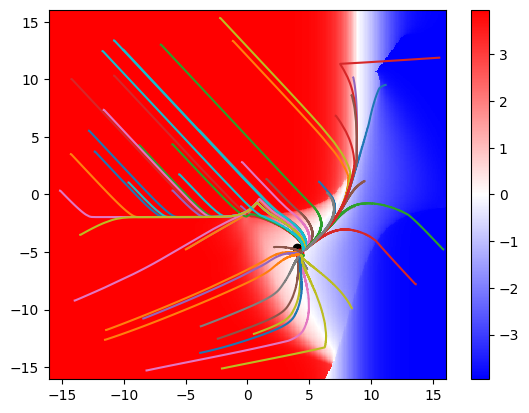

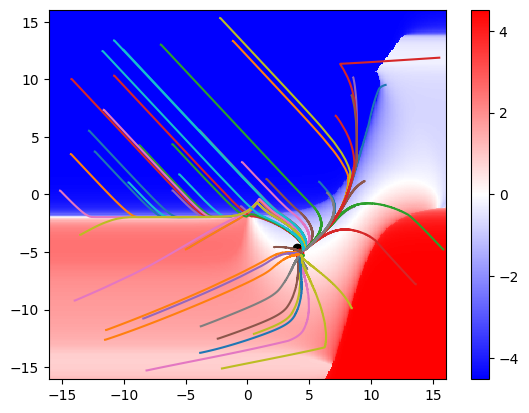

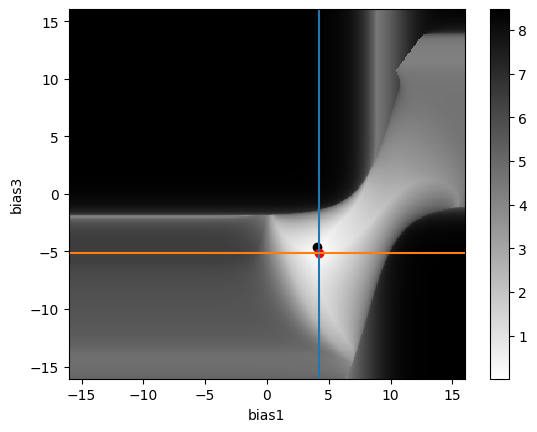

In [140]:
minpt = np.where(np.abs(change[:,:,0])+np.abs(change[:,:,1])==np.min(np.abs(change[:,:,0])+np.abs(change[:,:,1])))
biastrackindices = range(repeats)
plt.pcolormesh(par1_res,par2_res,change[:,:,0],cmap='bwr')
plt.colorbar()
plt.scatter(SvenB1,SvenB3,color='k')
plt.scatter(par2_res[minpt[1]],par1_res[minpt[0]],color='r')
for i in biastrackindices:
    plt.plot(biastrack[i,:,0],biastrack[i,:,1])
plt.show()
plt.pcolormesh(par1_res,par2_res,change[:,:,1],cmap='bwr')
plt.colorbar()
plt.scatter(SvenB1,SvenB3,color='k')
plt.scatter(par2_res[minpt[1]],par1_res[minpt[0]],color='r')
for i in biastrackindices:
    plt.plot(biastrack[i,:,0],biastrack[i,:,1])
plt.show()
plt.show()
plt.pcolormesh(par1_res,par2_res,np.abs(change[:,:,0])+np.abs(change[:,:,1]),cmap='binary')
plt.colorbar()
plt.scatter(SvenB1,SvenB3,color='k')
plt.scatter(par2_res[minpt[1]],par1_res[minpt[0]],color='r')
plt.vlines(par1_res[minpt[1]],par1_res[0],par1_res[-1],colors='tab:blue')
plt.hlines(par2_res[minpt[0]],par2_res[0],par2_res[-1],colors='tab:orange')
plt.ylabel('bias3')
plt.xlabel('bias1')
plt.show()

[-5.1]
[4.2]


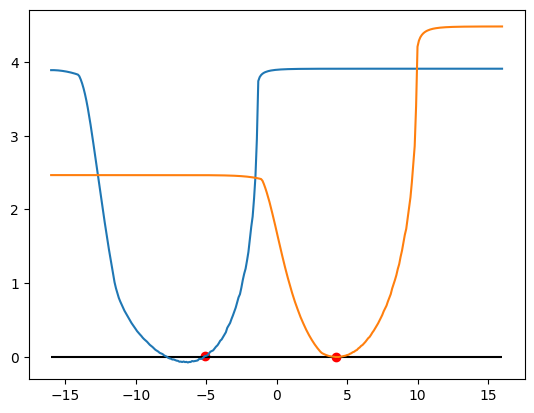

In [80]:
#calculating some critical points in the net change slice to use for bifurcation diagrams
b1sliceslice = change[:,minpt[1],0]
b3sliceslice = change[minpt[0],:,1][0]
print(par2_res[minpt[0]])
print(par1_res[minpt[1]])

plt.scatter(par1_res[minpt[0]],b1sliceslice[minpt[0]],color='r')
plt.scatter(par2_res[minpt[1]],b3sliceslice[minpt[1]],color='r')
plt.hlines(0,-16,16,color='k')

plt.plot(par1_res,b1sliceslice)
plt.plot(par2_res,b3sliceslice)
plt.show()

so what we're gonna do is fix bias1 at 5 while changing bias 3 and bias3 at -3.5 while changing bias1

In [146]:
SvenB1 = 4.04929
SvenB3 = -4.63354
change = np.loadtxt('../Cpp/Functioning2D/TestBestonDifferentSolutions/Sven/Svennetchange37.dat')
change = change.reshape((len(par1_res),len(par2_res),2))
change = np.swapaxes(change,1,0)

biastrack = np.loadtxt('../Cpp/Functioning2D/TestBestonDifferentSolutions/Sven/BiasTrack37.dat')
dt = .01
runduration = 10000
runsteps = int(runduration/dt)
repeats = int(1000/20)
biastrack = biastrack.reshape(repeats, runsteps, 2)

In [147]:
fitnesses =  np.loadtxt('../Cpp/Functioning2D/TestBestonDifferentSolutions/Sven/FinalFitness37.dat')
trackedfitnesses = fitnesses[::20]
print(np.where(trackedfitnesses<.3))

(array([], dtype=int64),)


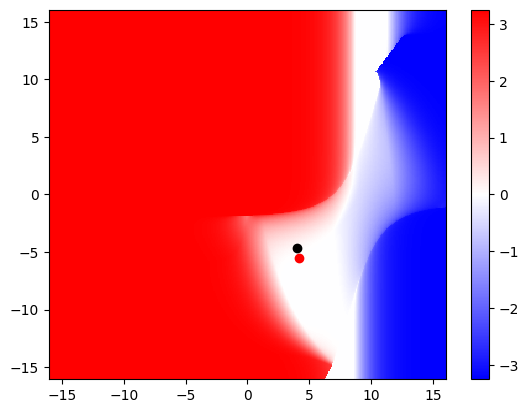

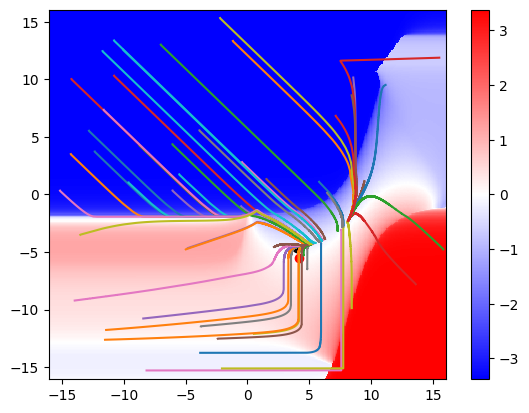

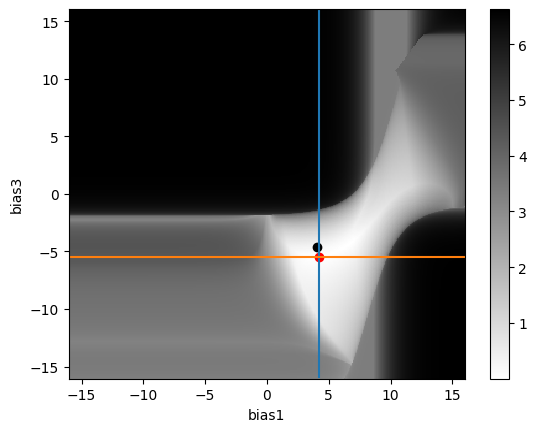

In [ ]:
minpt = np.where(np.abs(change[:,:,0])+np.abs(change[:,:,1])==np.min(np.abs(change[:,:,0])+np.abs(change[:,:,1])))
biastrackindices = range(repeats)
plt.pcolormesh(par1_res,par2_res,change[:,:,0],cmap='bwr')
plt.colorbar()
plt.scatter(SvenB1,SvenB3,color='k')
plt.scatter(par2_res[minpt[1]],par1_res[minpt[0]],color='r')
for i in biastrackindices:
    plt.plot(biastrack[i,:,0],biastrack[i,:,1])
plt.show()
plt.pcolormesh(par1_res,par2_res,change[:,:,1],cmap='bwr')
plt.colorbar()
plt.scatter(SvenB1,SvenB3,color='k')
plt.scatter(par2_res[minpt[1]],par1_res[minpt[0]],color='r')
for i in biastrackindices:
    plt.plot(biastrack[i,:,0],biastrack[i,:,1])
plt.show()
plt.show()
plt.pcolormesh(par1_res,par2_res,np.abs(change[:,:,0])+np.abs(change[:,:,1]),cmap='binary')
plt.colorbar()
plt.scatter(SvenB1,SvenB3,color='k')
plt.scatter(par2_res[minpt[1]],par1_res[minpt[0]],color='r')
plt.vlines(par1_res[minpt[1]],par1_res[0],par1_res[-1],colors='tab:blue')
plt.hlines(par2_res[minpt[0]],par2_res[0],par2_res[-1],colors='tab:orange')
plt.ylabel('bias3')
plt.xlabel('bias1')
plt.show()

In [131]:
par1 = 'theta1'
par2 = 'theta3'

par1_min = -16
par1_max = 16
par2_min = -16
par2_max = 16
par1_step = .1
par2_step = .1

par1_res = np.arange(par1_min,par1_max+par1_step,par1_step)
print(len(par1_res))
par2_res = np.arange(par2_min,par2_max+par2_step,par2_step)
print(len(par2_res))
#Theta1 Theta 3 slice with expanded area
# fitnessdata = np.loadtxt('slicetheta1theta3.dat').T
fitnessdata = np.loadtxt('../Cpp/Functioning2D/TestBestonDifferentSolutions/Sven/Sven_slice.dat').reshape(len(par1_res),len(par2_res))
fitnessdata = np.swapaxes(fitnessdata,1,0)
print(len(fitnessdata[0]))
# print(np.where(fitnessdata<.3))
Z_Static = np.ma.masked_greater_equal(fitnessdata, 0.15)
# Z_Static = Z_Static.filled(0.3)
Z_Disorder = np.ma.masked_less(fitnessdata, 0.15)
Z_Disorder = np.ma.masked_greater_equal(Z_Disorder,0.3)
# Z_Disorder = Z_Disorder.filled(0)
print(np.where(Z_Disorder==.3))
# print(Z_Disorder)
Z_Pyloric = np.ma.masked_less(fitnessdata,0.3)
print(Z_Pyloric.size)

321
321
321
(array([], dtype=int64), array([], dtype=int64))
103041


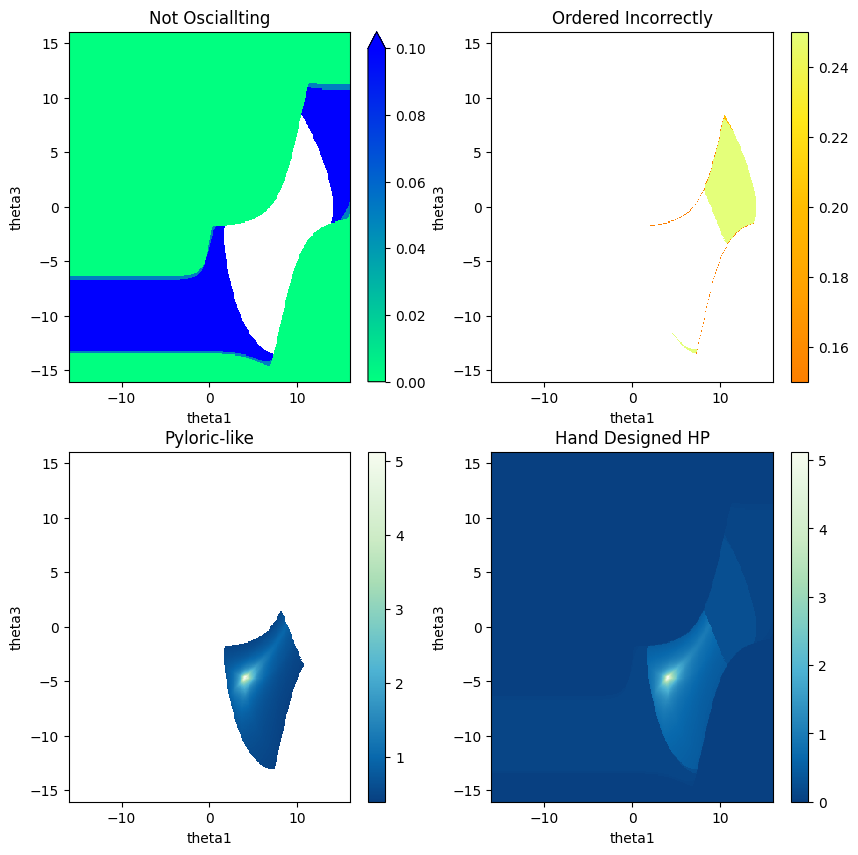

In [132]:
fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(figsize= (10,10),nrows=2,ncols=2)
plt.rcParams['text.usetex'] = False
levs = np.array([0,0.051,0.11,0.151])
pos1 = ax1.pcolormesh(par1_res,par2_res,Z_Static, cmap='winter_r')
# ax1.set_xticklabels(['',par1_min,'','','','',par1_max])
# ax1.set_yticklabels(['',par2_min,'','','','',par2_max])
fig.colorbar(pos1,ax=ax1,extend='max')
pos2 = ax2.pcolormesh(par1_res,par2_res,Z_Disorder, cmap='Wistia_r')
# ax2.set_xticklabels(['',par1_min,'','','','',par1_max])
# ax2.set_yticklabels(['',par2_min,'','','','',par2_max])
fig.colorbar(pos2,ax=ax2)
pos3 = ax3.pcolormesh(par1_res,par2_res,Z_Pyloric, cmap='GnBu_r')
# ax3.set_xticklabels(['',par1_min,'','','','',par1_max])
# ax3.set_yticklabels(['',par2_min,'','','','',par2_max])
fig.colorbar(pos3,ax=ax3)
pos4 = ax4.pcolormesh(par1_res,par2_res,fitnessdata, cmap='GnBu_r')
# ax4.set_xticklabels(['',par1_min,'','','','',par1_max])
# ax4.set_yticklabels(['',par2_min,'','','','',par2_max])
fig.colorbar(pos4,ax=ax4)
ax1.set_title("Not Osciallting")
ax2.set_title("Ordered Incorrectly")
ax3.set_title("Pyloric-like")
ax4.set_title("Hand Designed HP")
ax1.set_xlabel(par1)
ax1.set_ylabel(par2)
ax2.set_xlabel(par1)
ax2.set_ylabel(par2)
ax3.set_xlabel(par1)
ax3.set_ylabel(par2)
ax4.set_xlabel(par1)
ax4.set_ylabel(par2)
plt.show()

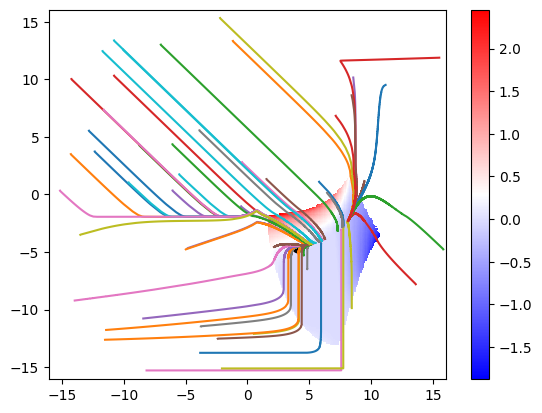

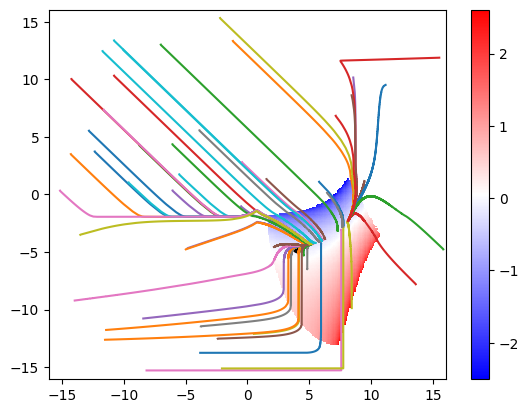

In [152]:
# Do the overlay
norm_fitnesses = fitnessdata/np.max(fitnessdata)
# print(norm_fitnesses.max())
masked_change_0 = np.ma.masked_where(np.ma.getmask(Z_Pyloric), change[:,:,0])
masked_change_1 = np.ma.masked_where(np.ma.getmask(Z_Pyloric), change[:,:,1])
biastrackindices=range(repeats)
plt.pcolormesh(par1_res,par2_res,masked_change_0,cmap='bwr')
for i in biastrackindices:
    plt.plot(biastrack[i,:,0],biastrack[i,:,1])
plt.colorbar()
plt.scatter(SvenB1,SvenB3,color='k')
plt.show()
plt.pcolormesh(par1_res,par2_res,masked_change_1,cmap='bwr')
for i in biastrackindices:
    plt.plot(biastrack[i,:,0],biastrack[i,:,1])
plt.colorbar()
plt.scatter(SvenB1,SvenB3,color='k')
plt.show()

It didn't have to be the case that a low value for one neuron co-occurs with a low value for the other. It could have been that there was no sum values close to zero at all. it seems like this is a prerequisite for making a good HP mechanism, and then the positioning can be adjusted accordingly

And another...

In [9]:
RonnB1 = 1.24027
RonnB3 =-12.2675
change = np.loadtxt('../Cpp/Ronnnetchange33.dat')
change = change.reshape((len(par1_res),len(par2_res),2))
change = np.swapaxes(change,1,0)

biastrack = np.loadtxt('../Cpp/RonnBiasTrack33.dat')
dt = .01
runduration = 10000
runsteps = int(runduration/dt)
repeats = int(1000/20)
biastrack = biastrack.reshape(repeats, runsteps, 2)

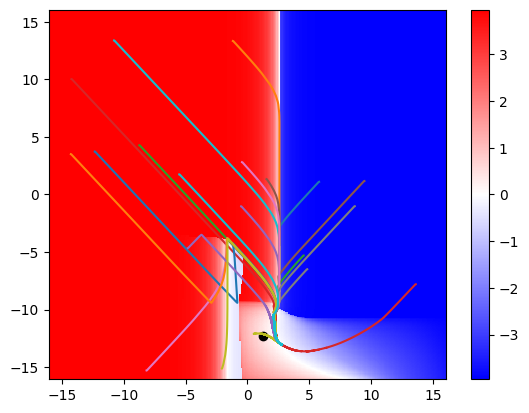

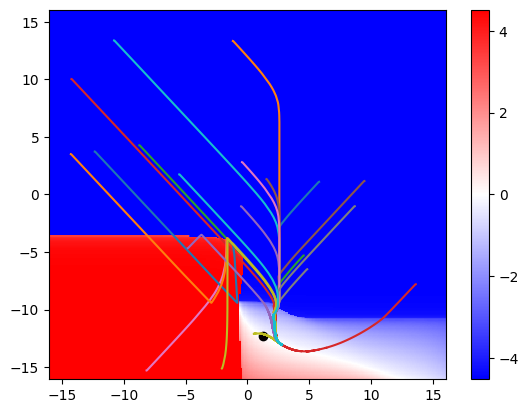

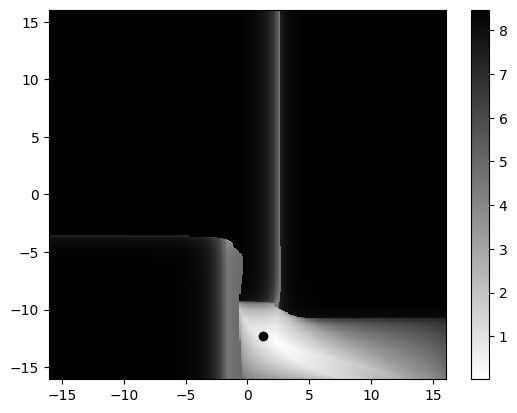

In [10]:
biastrackindices = range(20)
plt.pcolormesh(par1_res,par2_res,change[:,:,0],cmap='bwr')
plt.colorbar()
plt.scatter(RonnB1,RonnB3,color='k')
for i in biastrackindices:
    plt.plot(biastrack[i,:,0],biastrack[i,:,1])
plt.show()
plt.pcolormesh(par1_res,par2_res,change[:,:,1],cmap='bwr')
plt.colorbar()
plt.scatter(RonnB1,RonnB3,color='k')
for i in biastrackindices:
    plt.plot(biastrack[i,:,0],biastrack[i,:,1])
plt.show()
plt.show()
plt.pcolormesh(par1_res,par2_res,np.abs(change[:,:,0])+np.abs(change[:,:,1]),cmap='binary')
plt.colorbar()
plt.scatter(RonnB1,RonnB3,color='k')
plt.show()

CONTRAST WITH A LESS FIT HP MECHANISM (#37) TO FIND OUT WHY LESS FIT

In [17]:
change = np.loadtxt('../Cpp/Ronnnetchange37.dat')
change = change.reshape((len(par1_res),len(par2_res),2))
change = np.swapaxes(change,1,0)

biastrack = np.loadtxt('../Cpp/RonnBiasTrack37.dat')
dt = .01
runduration = 10000
runsteps = int(runduration/dt)
repeats = int(1000/20)
biastrack = biastrack.reshape(repeats, runsteps, 2)

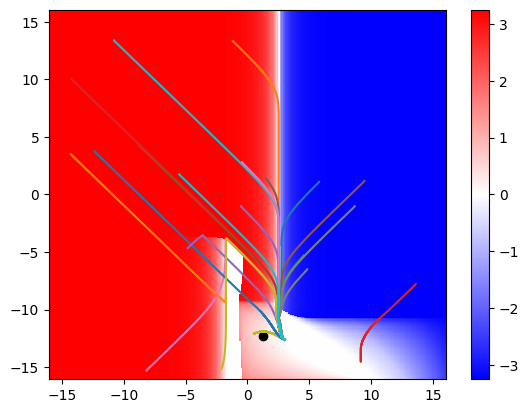

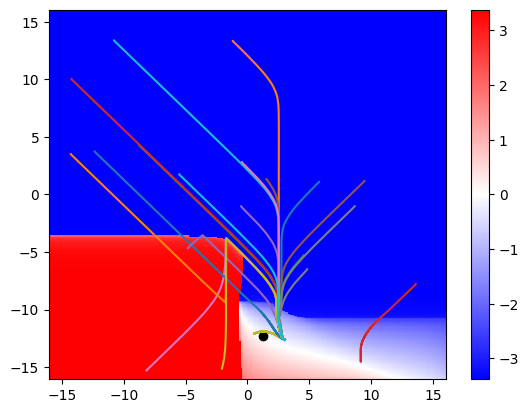

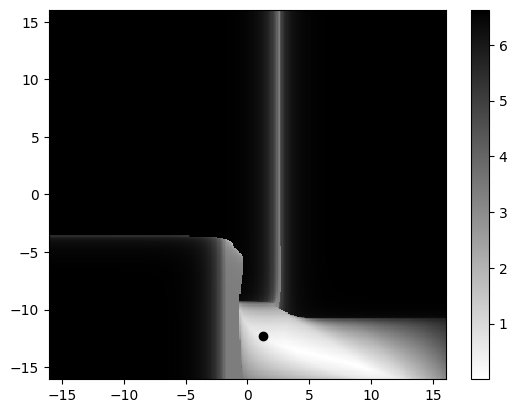

In [18]:
biastrackindices = range(20)
plt.pcolormesh(par1_res,par2_res,change[:,:,0],cmap='bwr')
plt.colorbar()
plt.scatter(RonnB1,RonnB3,color='k')
for i in biastrackindices:
    plt.plot(biastrack[i,:,0],biastrack[i,:,1])
plt.show()
plt.pcolormesh(par1_res,par2_res,change[:,:,1],cmap='bwr')
plt.colorbar()
plt.scatter(RonnB1,RonnB3,color='k')
for i in biastrackindices:
    plt.plot(biastrack[i,:,0],biastrack[i,:,1])
plt.show()
plt.pcolormesh(par1_res,par2_res,np.abs(change[:,:,0])+np.abs(change[:,:,1]),cmap='binary')
plt.colorbar()
plt.scatter(RonnB1,RonnB3,color='k')
plt.show()


A new pyloric plane that does not play nice with star HP #33 (it looks from the grid test that there are two groups of endpoints)

In [10]:
change = np.loadtxt('../Cpp/Functioning2D/TestBestonDifferentSolutions/Terrence/Terrencenetchange33.dat')
change = change.reshape((len(par1_res),len(par2_res),2))
change = np.swapaxes(change,1,0)

biastrack = np.loadtxt('../Cpp/Functioning2D/TestBestonDifferentSolutions/Terrence/BiasTrack33.dat')
dt = .05
runduration = 10000+dt+dt
runsteps = int(runduration/(dt))
repeats = int(1000/50)
biastrack = biastrack.reshape(repeats, runsteps, 2)

statestrack = np.loadtxt('../Cpp/Functioning2D/TestBestonDifferentSolutions/Terrence/StatesTrack33.dat')
statestrack = statestrack.reshape(repeats, runsteps, 3)

detectedtrack = np.loadtxt('../Cpp/Functioning2D/TestBestonDifferentSolutions/Terrence/DetectedActivity33.dat')
detectedtrack = detectedtrack.reshape(repeats, runsteps, 3)

TerrenceB1 = 1.68194
TerrenceB3 = -2.02981


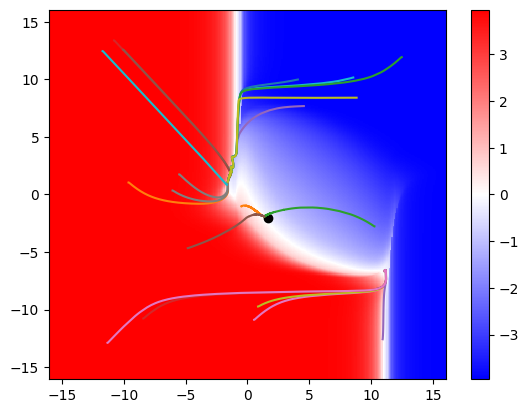

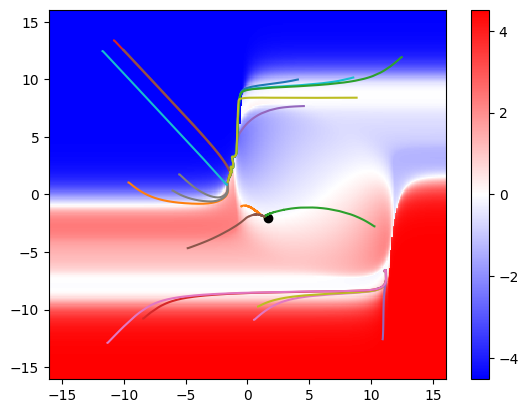

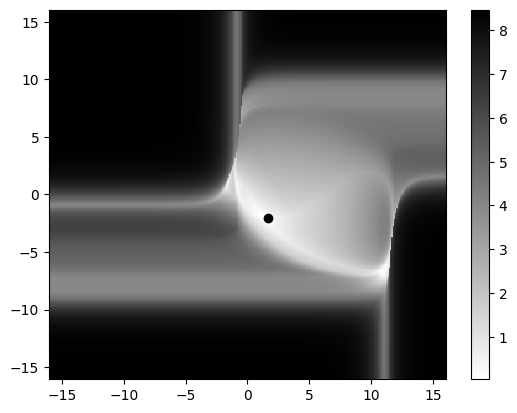

In [11]:
biastrackindices = range(repeats)
plt.pcolormesh(par1_res,par2_res,change[:,:,0],cmap='bwr')
plt.colorbar()
plt.scatter(TerrenceB1,TerrenceB3,color='k')
for i in biastrackindices:
    plt.plot(biastrack[i,:,0],biastrack[i,:,1])
plt.show()
plt.pcolormesh(par1_res,par2_res,change[:,:,1],cmap='bwr')
plt.colorbar()
plt.scatter(TerrenceB1,TerrenceB3,color='k')
for i in biastrackindices:
    plt.plot(biastrack[i,:,0],biastrack[i,:,1])
plt.show()
plt.pcolormesh(par1_res,par2_res,np.abs(change[:,:,0])+np.abs(change[:,:,1]),cmap='binary')
plt.colorbar()
plt.scatter(TerrenceB1,TerrenceB3,color='k')
plt.show()

What does the pyloric fitness of this slice look like?

In [12]:
fitnessdata = np.loadtxt('../Cpp/Functioning2D/TestBestonDifferentSolutions/Terrence/Terrence_slice.dat').reshape((len(par1_res),-1)).T
# fitnessdata = np.loadtxt('../Cpp/slicetheta1theta2.dat')
# print(len(fitnessdata))
# print(np.where(fitnessdata<.3))
Z_Static = np.ma.masked_greater_equal(fitnessdata, 0.15)
# Z_Static = Z_Static.filled(0)
# print(Z_Static)
Z_Disorder = np.ma.masked_less(fitnessdata, 0.15)
Z_Disorder = np.ma.masked_greater_equal(Z_Disorder,0.3)
# Z_Disorder = Z_Disorder.filled(0)
# print(Z_Disorder)
Z_Pyloric = np.ma.masked_less(fitnessdata,0.3)
# print(Z_Pyloric)


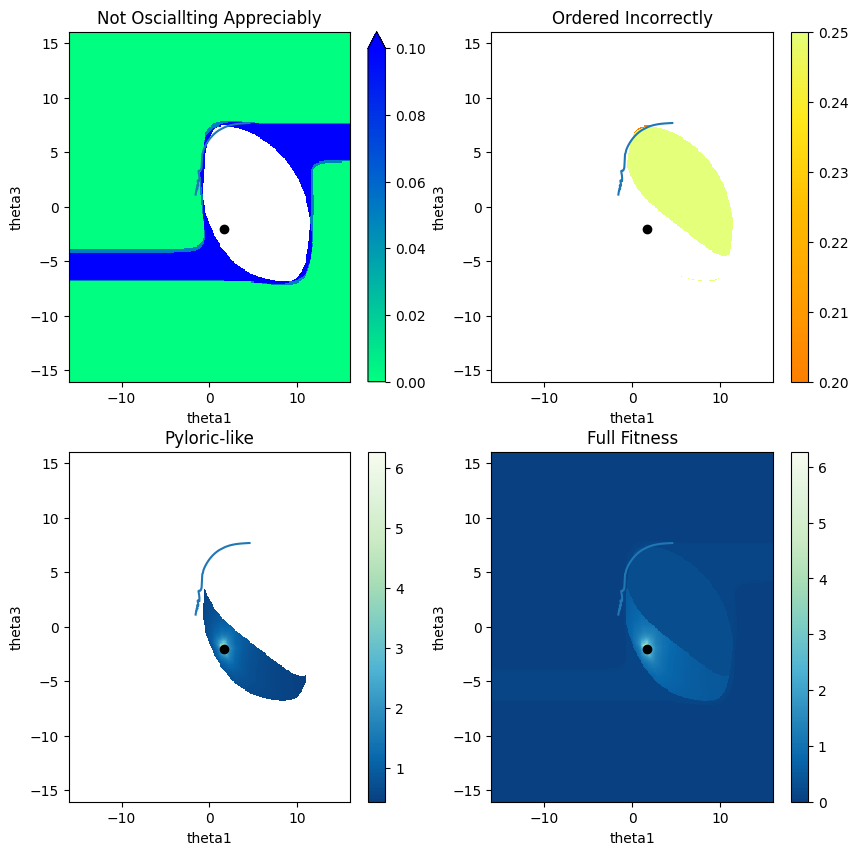

In [13]:
par1 = 'theta1'
par2 = 'theta3'
biastrackindices = np.arange(4,5).astype(int)
fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(figsize= (10,10),nrows=2,ncols=2)
plt.rcParams['text.usetex'] = False
levs = np.array([0,0.051,0.11,0.151])
pos1 = ax1.pcolormesh(par1_res,par2_res,Z_Static, cmap='winter_r')
# ax1.set_xticklabels(['',par1_min,'','','','',par1_max])
# ax1.set_yticklabels(['',par2_min,'','','','',par2_max])
fig.colorbar(pos1,ax=ax1,extend='max')
pos2 = ax2.pcolormesh(par1_res,par2_res,Z_Disorder, cmap='Wistia_r')
# ax2.set_xticklabels(['',par1_min,'','','','',par1_max])
# ax2.set_yticklabels(['',par2_min,'','','','',par2_max])
fig.colorbar(pos2,ax=ax2)
pos3 = ax3.pcolormesh(par1_res,par2_res,Z_Pyloric, cmap='GnBu_r')
# ax3.set_xticklabels(['',par1_min,'','','','',par1_max])
# ax3.set_yticklabels(['',par2_min,'','','','',par2_max])
fig.colorbar(pos3,ax=ax3)
pos4 = ax4.pcolormesh(par1_res,par2_res,fitnessdata, cmap='GnBu_r')
# ax4.set_xticklabels(['',par1_min,'','','','',par1_max])
# ax4.set_yticklabels(['',par2_min,'','','','',par2_max])
fig.colorbar(pos4,ax=ax4)
ax1.set_title("Not Osciallting Appreciably")
ax2.set_title("Ordered Incorrectly")
ax3.set_title("Pyloric-like")
ax4.set_title("Full Fitness")
ax1.set_xlabel(par1)
ax1.set_ylabel(par2)
ax2.set_xlabel(par1)
ax2.set_ylabel(par2)
ax3.set_xlabel(par1)
ax3.set_ylabel(par2)
ax4.set_xlabel(par1)
ax4.set_ylabel(par2)
ax1.scatter(TerrenceB1,TerrenceB3,color='k')
for i in biastrackindices:
    ax1.plot(biastrack[i,:,0],biastrack[i,:,1])
ax2.scatter(TerrenceB1,TerrenceB3,color='k')
for i in biastrackindices:
    ax2.plot(biastrack[i,:,0],biastrack[i,:,1])
ax3.scatter(TerrenceB1,TerrenceB3,color='k')
for i in biastrackindices:
    ax3.plot(biastrack[i,:,0],biastrack[i,:,1])
ax4.scatter(TerrenceB1,TerrenceB3,color='k')
for i in biastrackindices:
    ax4.plot(biastrack[i,:,0],biastrack[i,:,1])
plt.show()

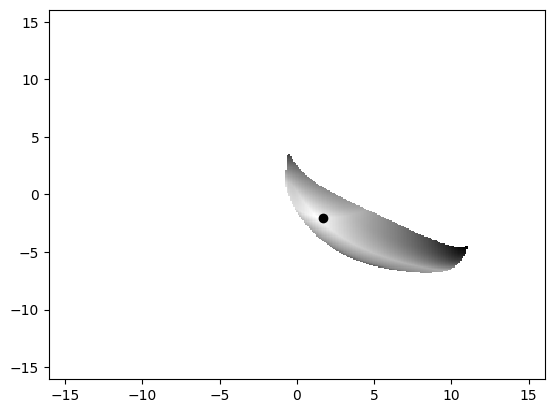

In [14]:
only_pyloric_1 = np.ma.masked_where(fitnessdata<.3,change[:,:,0])
only_pyloric_3 = np.ma.masked_where(fitnessdata<.3,change[:,:,1])
plt.pcolormesh(par1_res,par2_res,np.abs(only_pyloric_1)+np.abs(only_pyloric_3),cmap='binary')
plt.scatter(TerrenceB1,TerrenceB3,color='k')
plt.show()